# Introduction
How to open and understand the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic information
1. Hyperspectral data:
    1. `hsi_path` contains path to hyperspectral masked numpy arrays containing hyperspectral data that underwent masking (i.e., the field area is masked, whereas all irrelevant areas are not masked)
    2. The name of the file (e.g., _'1989.npz'_) refers to the index of the corresponding training sample in the ground-truth table.
2. Ground-truth data:
    1. `gt_path` contains path to ground truth .csv file.
    2. Additionally, `wavelength_path` contains the mapping between a band number and the corresponding wavelength.


In [2]:
hsi_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_data/1500.npz'
gt_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_gt.csv'
wavelength_path = 'D:/datasets/soilHyperspec/train_data/train_data/wavelengths.csv'

In [3]:
gt_df = pd.read_csv(gt_path)
wavelength_df = pd.read_csv(wavelength_path)

# Inspect bands - All Images

In [5]:
from tqdm.notebook import tqdm

#load in data, reshape and stack it
for i in tqdm(range(0,1732)): #range(0,1732,10) for every 10nth
    path = r"D:/datasets/soilHyperspec/train_data/train_data/train_data/" + str(i) + ".npz"
    with np.load(path) as npz:
        arr = np.ma.MaskedArray(**npz)
    
    # here, we keep all the pixels
    reshapeRatio = (arr.shape[1])*(arr.shape[2])
    
    # here we just want the mask region
    newArrmasked = arr.reshape(150, reshapeRatio).transpose()
    
    if i == 0:
        allImsM = newArrmasked
    else:
        allImsM = np.ma.vstack((allImsM,newArrmasked))
    
allImsM = pd.DataFrame(allImsM).dropna()

  0%|          | 0/1732 [00:00<?, ?it/s]

# Dimensionality Reduction with TruncatedSVD

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
svd.fit(allImsM)#fitting all masked images

TruncatedSVD()

In [7]:
varRat = svd.explained_variance_ratio_

Text(0, 0.5, '% variance')

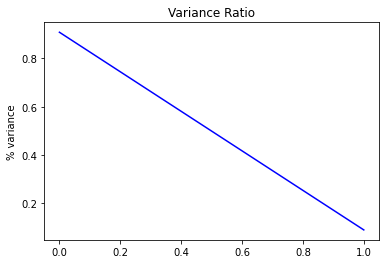

In [10]:
#plot data variance ratio
plt.figure()
x = np.linspace(0,121)
plt.plot(varRat,'blue')
plt.title('Variance Ratio')

#why graph flat? - incorrect code?
plt.ylabel('% variance')

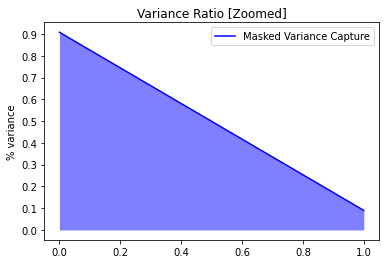

In [13]:
plt.figure()
plt.ylabel('% variance')
plt.title('Variance Ratio [Zoomed]')
plt.plot(varRat[:10],'blue')
plt.yticks(np.arange(0, 1, 0.1))
x = np.arange(2)
plt.fill_between(
        x,
        varRat[:10],
        color='blue',
        alpha=0.5,
        linewidth=0,
        )
plt.legend(['Masked Variance Capture'])

In [14]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(varRat)

[0.908602 0.089781]


In [15]:
#transform
#masked
maskedRx = svd.transform(allImsM)


In [19]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

print(maskedRx[:,:2])

[[15148.873850 3883.658806]
 [14997.994562 3872.968809]
 [14778.616768 3478.550514]
 ...
 [12445.625411 2994.506961]
 [12270.708839 2882.427769]
 [12608.813645 2945.456377]]


In [20]:
#save transformed array
from numpy import savetxt
savetxt('SVDmaskedRx.csv', maskedRx[:,:2], delimiter=',')